In [1]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [5]:
df = pd.read_csv(r'datasets/dataset.csv')
for column in df.columns:
    if len(df[column].unique()) == 1:
        df = df.drop(column, axis=1)
        print(column)
df.to_csv('datasets/filter_data.csv', index_label='Index')
# df = pd.read_csv('datasets/filter_data.csv', index_col='Index', parse_dates=["DateOfCall"], dtype={"CalYear": int, "HourOfCall": int})
df = pd.read_csv('datasets/filter_data.csv', index_col='Index', dtype={"CalYear": int, "HourOfCall": int})
df.info()

IncGeo_BoroughCode
IncGeo_BoroughName
ProperCase
FRS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12097 entries, 0 to 12096
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          12097 non-null  object 
 1   DateOfCall                              12097 non-null  object 
 2   CalYear                                 12097 non-null  int64  
 3   TimeOfCall                              12097 non-null  object 
 4   HourOfCall                              12097 non-null  int64  
 5   IncidentGroup                           12097 non-null  object 
 6   StopCodeDescription                     12097 non-null  object 
 7   SpecialServiceType                      3887 non-null   object 
 8   PropertyCategory                        12097 non-null  object 
 9   PropertyType                            12097 non-null  object 
 10  Addre

In [7]:
df.drop(['UPRN', 'USRN', 'IncGeo_WardCode', 'IncGeo_WardName', 'IncGeo_WardNameNew', 'Postcode_full', 'Postcode_district'], axis=1, inplace=True)

In [4]:
df.IncidentGroup.value_counts()

False Alarm        6952
Special Service    3887
Fire               1258
Name: IncidentGroup, dtype: int64

In [3]:
df.StopCodeDescription.value_counts()

AFA                                      5873
Special Service                          3723
False alarm - Good intent                1013
Primary Fire                              794
Secondary Fire                            463
Flood call attended - Batch mobilised     164
False alarm - Malicious                    66
Chimney Fire                                1
Name: StopCodeDescription, dtype: int64

Text(0.5, 1.0, 'Frequency of IncidentGroup by Year')

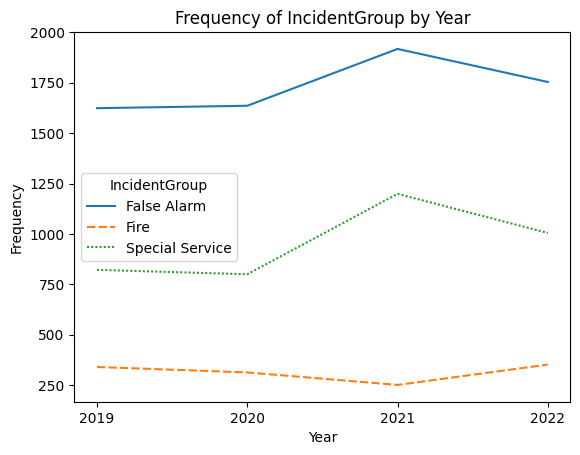

In [33]:
df_grouped = df.groupby(['CalYear', 'IncidentGroup']).size().reset_index(name='count')

# Create a pivot table with year as index, IncidentGroup as columns, and count as values
df_pivot = df_grouped.pivot(index='CalYear', columns='IncidentGroup', values='count')

# Plot the figure using seaborn's lineplot function
sns.lineplot(data=df_pivot)
plt.xticks(range(int(df['CalYear'].min()), int(df['CalYear'].max())+1))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of IncidentGroup by Year')


<Axes: >

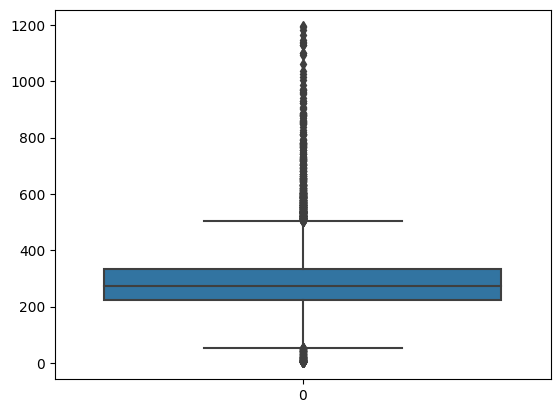

In [30]:
column = 'FirstPumpArriving_AttendanceTime'
sns.boxplot(df[column])

In [ ]:
sns.boxplot(df[column])  # to plot a boxplot to identify outliers
q1 = df[column].quantile(0.25)
q3 = df[column].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]


In [ ]:
# define the categorical column
cat_cols = df.select_dtypes(include='object').columns

# create the countplot
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, y=cat_cols[5])

# set the labels
ax.set_xlabel("Count")
ax.set_ylabel(cat_cols[5])

plt.show()


In [ ]:
import folium

df_2 = df.dropna(subset=['Latitude', 'Longitude'])

# Create a map object centered on the first row of data
map = folium.Map(location=[df_2['Latitude'][0], df_2['Longitude'][0]], zoom_start=12)

# Loop through the rows of data and add a marker for each location
for index, row in df_2.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(map)

# Display the map
map


In [4]:
from folium.plugins import HeatMap

df_false_alarms = df[df['IncidentGroup'] == 'False Alarm']

# Drop rows with null values in the Latitude and Longitude columns
df_heatmap = df_false_alarms.dropna(subset=['Latitude', 'Longitude'])

# Create a map object centered on the mean of the latitude and longitude columns
m = folium.Map(location=[51.498611, -0.210884], zoom_start=13.5)

# Create a list of coordinates from the Latitude and Longitude columns
coordinates = df_heatmap[['Latitude', 'Longitude']].values.tolist()

# Create a heatmap layer
heatmap = HeatMap(data=coordinates)

# Add the heatmap layer to the map
heatmap.add_to(m)

# Display the map
m

In [ ]:
df['Notional Cost (£)'].fillna(df['Notional Cost (£)'].mean(), inplace=True)

In [ ]:
from folium.plugins import MarkerCluster

# create a map centered on the mean of the latitude and longitude columns
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# create a MarkerCluster object
marker_cluster = MarkerCluster()

# iterate over the rows of the dataframe and add a marker for each row
for index, row in df.iterrows():
    # check if the latitude and longitude are not null
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        # create a popup message for the marker
        popup_msg = f"Date: {row['DateOfCall']}<br>Time: {row['TimeOfCall']}"
        # create a marker and add it to the MarkerCluster object
        marker = folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup_msg)
        marker_cluster.add_child(marker)

# add the MarkerCluster object to the map
m.add_child(marker_cluster)

# display the map
m


In [35]:
for column in df.select_dtypes(include='number'):
    # if df[column].isnull().sum() == 0:
    print(f"Column: {column}")
    print(f"Skewness: {skew(df[column])}")
    print(f"Kurtosis: {kurtosis(df[column])}")


Column: Unnamed: 0
Skewness: 0.0
Kurtosis: -1.2000000164004547
Column: CalYear
Skewness: -0.11071322491430158
Kurtosis: -1.3236670810576634
Column: HourOfCall
Skewness: -0.45501911481300533
Kurtosis: -0.6513907590495518
Column: UPRN
Skewness: 11.393207935730263
Kurtosis: 127.85422665391084
Column: USRN
Skewness: 4.9865456596077475
Kurtosis: 577.3674367279223
Column: Easting_m
Skewness: nan
Kurtosis: nan
Column: Northing_m
Skewness: nan
Kurtosis: nan
Column: Easting_rounded
Skewness: 0.1918570765086197
Kurtosis: -0.8452282247656697
Column: Northing_rounded
Skewness: 0.13841739084422053
Kurtosis: -0.6239522371110389
Column: Latitude
Skewness: nan
Kurtosis: nan
Column: Longitude
Skewness: nan
Kurtosis: nan
Column: FirstPumpArriving_AttendanceTime
Skewness: nan
Kurtosis: nan
Column: SecondPumpArriving_AttendanceTime
Skewness: nan
Kurtosis: nan
Column: NumStationsWithPumpsAttending
Skewness: nan
Kurtosis: nan
Column: NumPumpsAttending
Skewness: nan
Kurtosis: nan
Column: PumpCount
Skewness: 

In [7]:
print(df['UPRN'].value_counts())

0           7859
34020469     122
34118359      38
34030526      27
34145628      25
            ... 
34087531       1
34077583       1
34003778       1
34081922       1
34056087       1
Name: UPRN, Length: 2154, dtype: int64


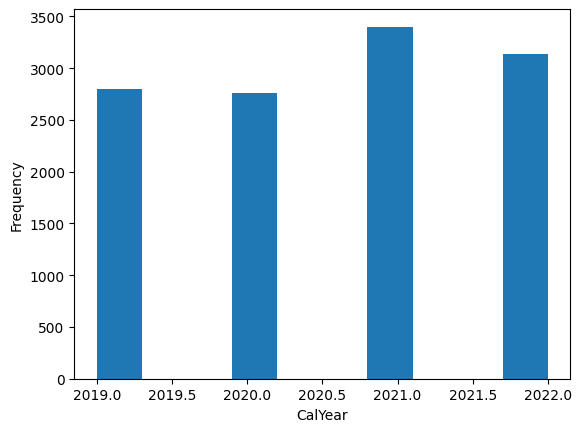

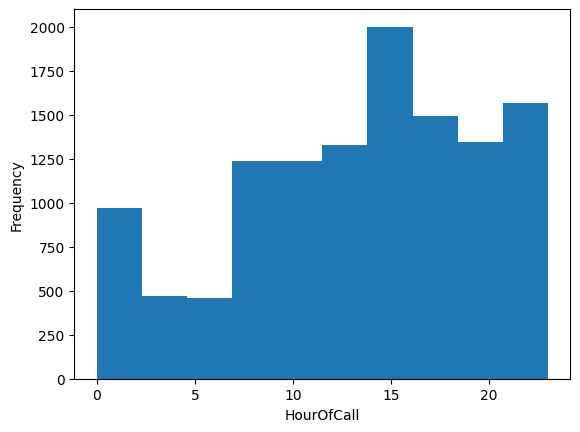

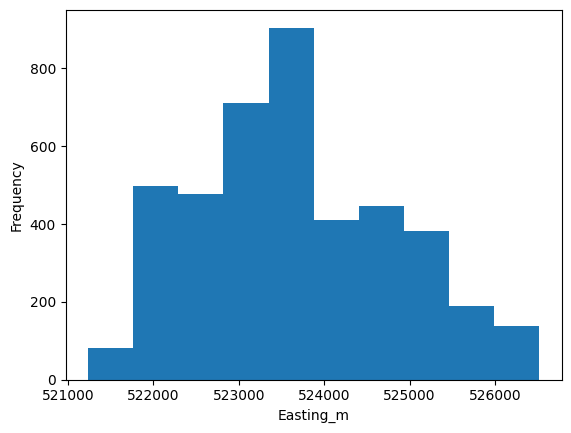

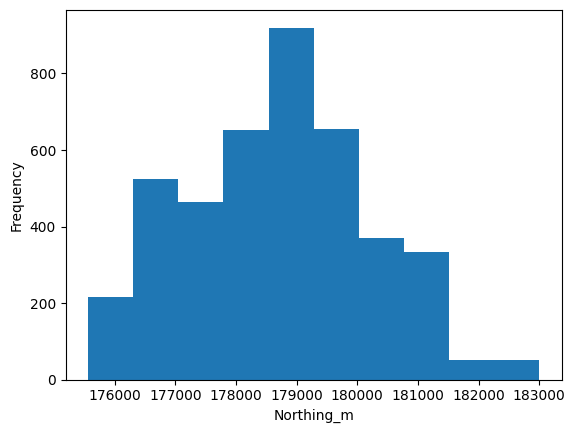

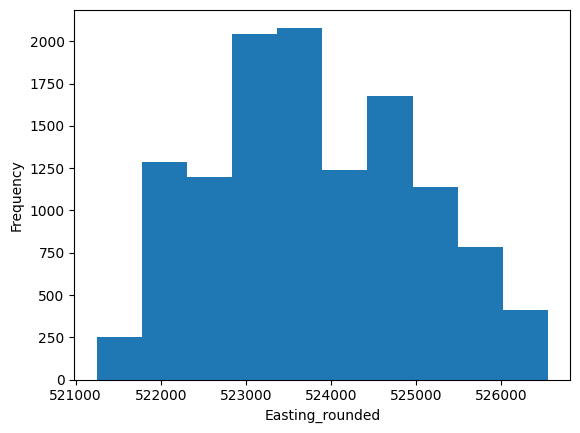

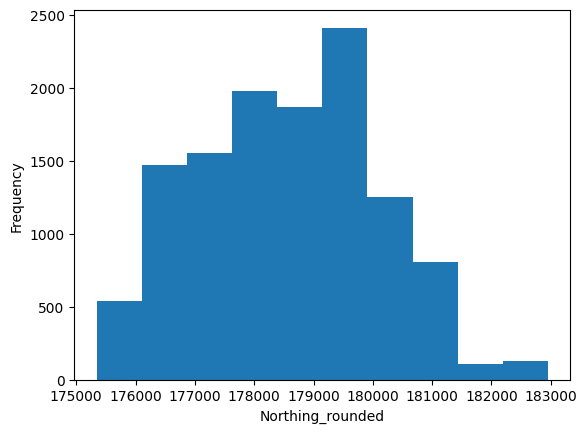

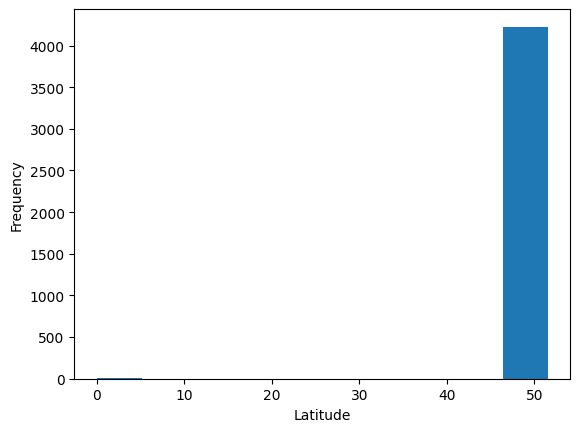

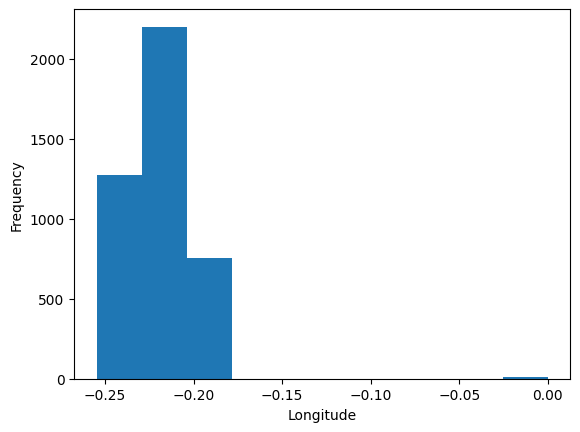

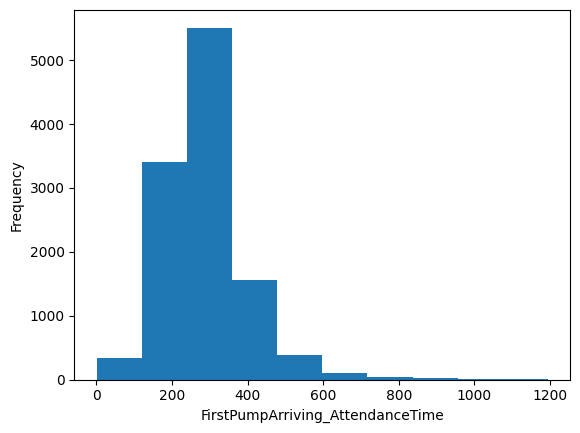

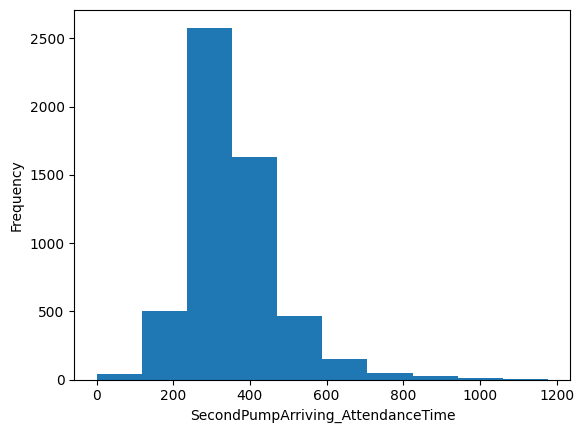

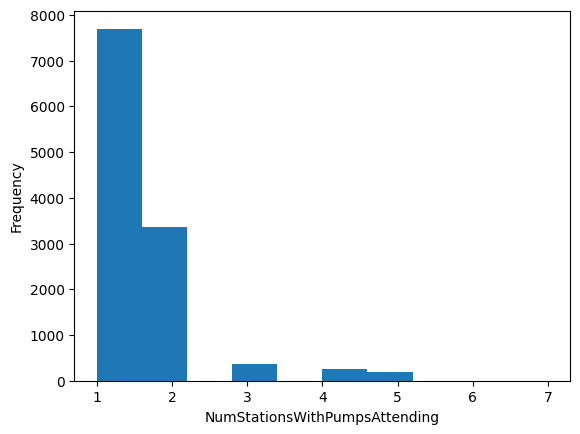

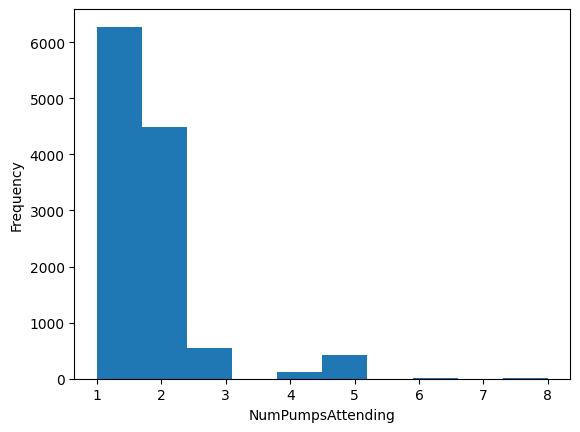

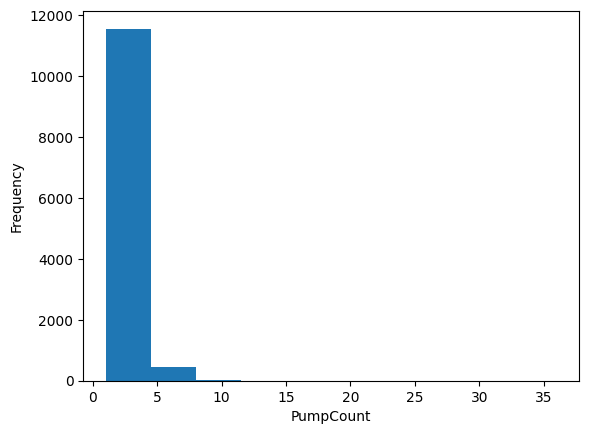

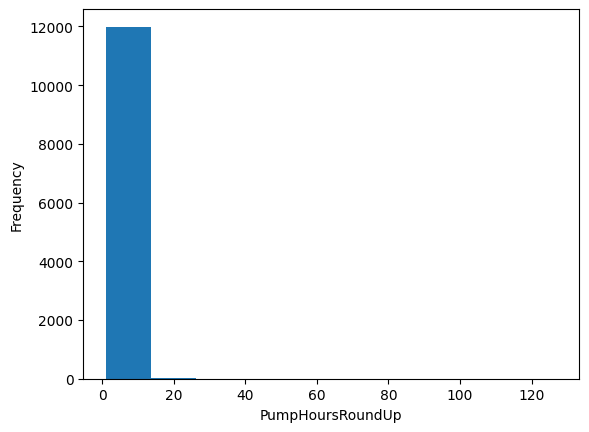

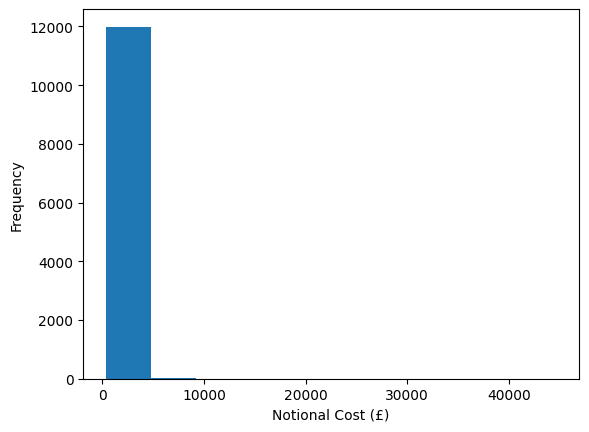

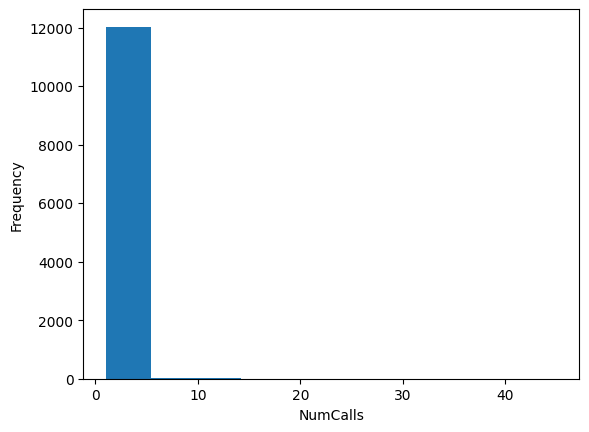

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in num_cols:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [44]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the sample data
data = pd.read_csv("datasets/dataset.csv")

# select relevant columns
features = ["TimeOfCall", "PropertyCategory", "PropertyType", "Postcode_district"]
target = "IncidentGroup"

# convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data[features + [target]])
target = "IncidentGroup_False Alarm"

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

# train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# make predictions on the test set and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [47]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=["False Alarm", "Other"],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("false_alarm_tree")  


'false_alarm_tree.pdf'

In [ ]:
df_t = df['NumCalls']
# calculate the IQR for each column
Q1 = df_t.quantile(0.25)
Q3 = df_t.quantile(0.75)
IQR = Q3 - Q1

# define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((df_t < (Q1 - 1.5 * IQR)) | (df_t > (Q3 + 1.5 * IQR))).any(axis=1)

# print the rows containing outliers
# You can adjust the threshold value of 1.5 to make it more or less sensitive to outliers
print(df_t[outliers])